Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [2]:
Insurance_Data = pd.read_csv(r'C:\Users\Dell\Downloads\insurance.csv')

In [3]:
# Inspecting the first few rows of the dataset
Insurance_Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
Insurance_Data.shape

(1338, 7)

In [5]:
# Displaying the dataset information (data types, non-null counts)
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [11]:
# checking for missing values
Insurance_Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [13]:
Insurance_Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Dell\AppData\Local\Temp\ipykernel_7868\3168055361.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance_Data['age'])


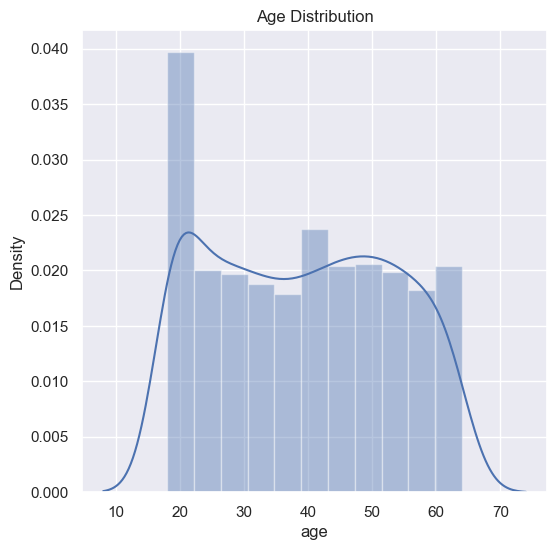

In [20]:
# Visualizing the distribution of the 'age' column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Insurance_Data['age'])
plt.title('Age Distribution')
plt.show()


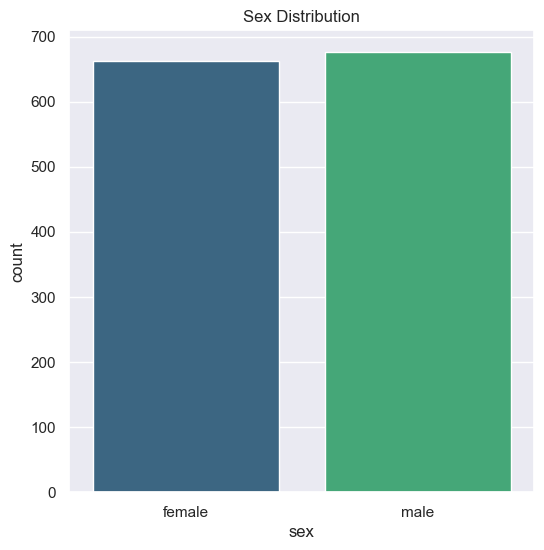

In [41]:
# Visualizing the distribution of the 'sex' column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=Insurance_Data, hue='sex', palette='viridis', legend=False)
plt.title('Sex Distribution')
plt.show()

In [22]:
# Displaying the count of each category in the 'sex' column
Insurance_Data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_7868\2638459316.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance_Data['bmi'])


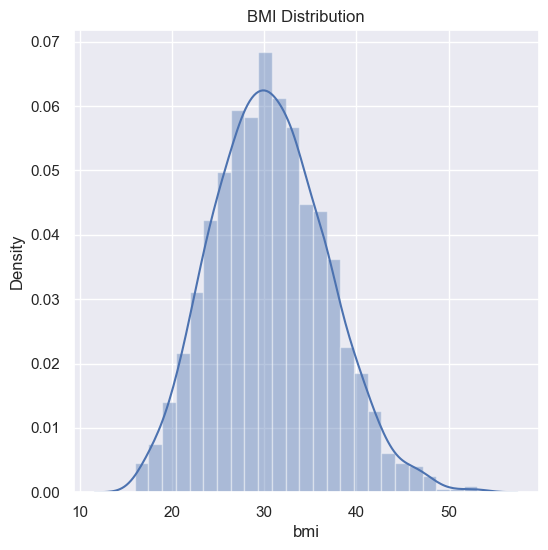

In [23]:
# Visualizing the distribution of the 'bmi' column
plt.figure(figsize=(6,6))
sns.distplot(Insurance_Data['bmi'])
plt.title('BMI Distribution')
plt.show()

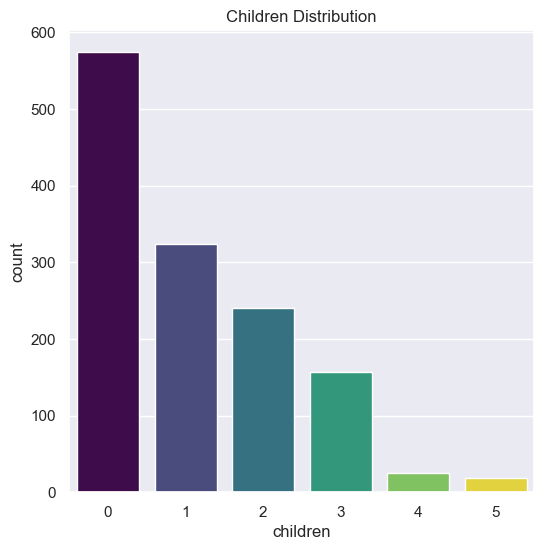

In [40]:
# Visualizing the distribution of the 'children' column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insurance_Data, hue='children', palette='viridis', legend=False )
plt.title('Children Distribution')
plt.show()

In [35]:
# Displaying the count of each category in the 'children' column
Insurance_Data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

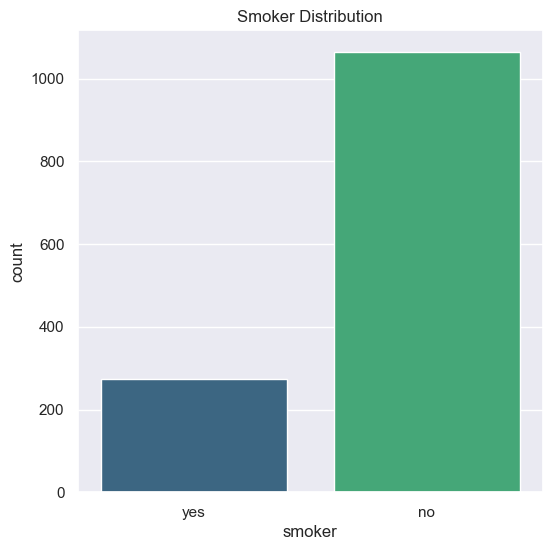

In [39]:
# Visualizing the distribution of the 'smoker' column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=Insurance_Data, hue='smoker', palette='viridis', legend=False )
plt.title('Smoker Distribution')
plt.show()

In [37]:
# Displaying the count of each category in the 'smoker' column
Insurance_Data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

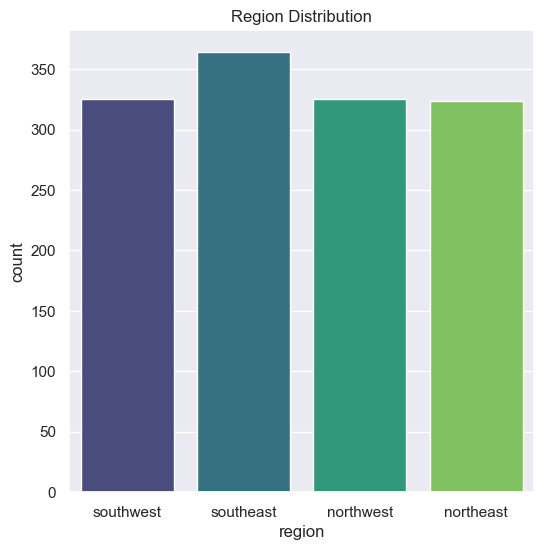

In [42]:
# Visualizing the distribution of the 'region' column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=Insurance_Data, hue='region', palette='viridis', legend=False )
plt.title('Region Distribution')
plt.show()

In [43]:
# Displaying the count of each category in the 'region' column
Insurance_Data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_7868\2522413577.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance_Data['charges'])


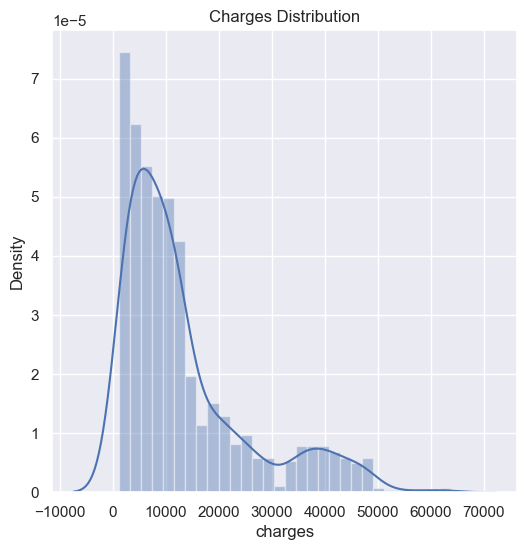

In [44]:
# Visualizing the distribution of the 'charges' column
plt.figure(figsize=(6,6))
sns.distplot(Insurance_Data['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-processing

In [49]:
# Encoding the categorical features
# Sex column
Insurance_Data['sex'] = Insurance_Data['sex'].replace({'male': 0, 'female': 1}).astype(int)

# Smoker column
Insurance_Data['smoker'] = Insurance_Data['smoker'].replace({'yes': 0, 'no': 1}).astype(int)

# Region column
Insurance_Data['region'] = Insurance_Data['region'].replace({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}).astype(int)


In [50]:
print(Insurance_Data)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


In [51]:
# Splitting the features and targets
X = Insurance_Data.drop(columns='charges', axis=1)
Y = Insurance_Data['charges']

In [52]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [53]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =2)


In [54]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [55]:
# model training
# Linear Regression 
regressor=LinearRegression()

In [56]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [57]:
# model evaluation
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [59]:
# R squared value 
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Value : ', r2_train)

R Squared Value :  0.751505643411174


In [62]:
# prediction on training data
testing_data_prediction = regressor.predict(X_test)

In [63]:
# R squared value 
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R Squared Value : ', r2_test)

R Squared Value :  0.7447273869684077


In [65]:
# Building the predictive system
# Defining a sample input tuple (age, sex, bmi, children, smoker, region)
input_data = (31,1,25.74,0,1,0)

# changing input data to a numpy array
input_data_as_nparray = np.asarray(input_data)

#reshape the arrray
input_data_reshaped= input_data_as_nparray.reshape(1,-1)

# Making a prediction using the trained model
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The Insurance cost is USD ', prediction[0])


[3760.0805765]
The Insurance cost is USD  3760.0805764960496


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
